In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
X = np.asarray([[0, 1, 2, 3, 4, 5, 6]]).T
y = np.asarray([0, 3, 7, -1, 0, 5, 10])
m,n=X.shape

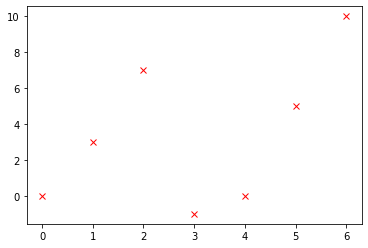

In [19]:
plt.plot(X, y, 'rx')


In [20]:
# Add a bias factor to X.
X = np.hstack((np.ones((m, 1)), X))


In [21]:
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((m, 1)),
    (X[:, 1] ** 3).reshape((m, 1)),
))
m, n = X.shape

In [22]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)


In [23]:
def h(X, theta):
  return X @ theta


In [24]:
theta = np.random.rand(n)
predictions = h(X, theta)


In [25]:
theta.shape

(4,)

In [26]:
b1=[0,1,10,1000]

In [27]:
X.shape

(7, 4)

In [28]:
def J(theta, X, y):
  return np.mean(np.square(h(X, theta) - y)+b*(theta.T@theta))


In [29]:
theta1=[]
i1=[]
losses=[]
for b in b1:
  alpha = 0.01
  theta = theta - alpha * (1/m) * (X.T @ ((X @ theta) - y)+b*theta)
  loss=[]
  l_old=0
  l=1
  i=0
  # stopping criteria l-l_old>0.001
  while(np.abs(l-l_old)>0.001):
    l_old=J(theta, X, y)
    # print(l_old)
    theta = theta - alpha * (1/m) * (X.T @ ((X @ theta) - y)+b*theta)
    l=J(theta, X, y)
    # print(l)
    i+=1
    loss.append(l)
  theta1.append(theta)
  i1.append(i)
  losses.append(l)


In [30]:
theta1

[array([ 3.42513789, -0.40478881,  0.60005546,  2.08695886]),
 array([ 3.01014256, -0.36994145,  0.52879365,  2.01727569]),
 array([1.41228016, 0.33024413, 0.50175308, 0.70119199]),
 array([0.02383577, 0.01319788, 0.01530053, 0.01709024])]

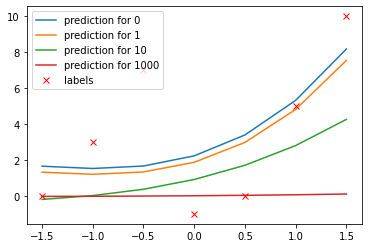

In [31]:
for i in range(len(b1)):
    prediction = h(X, theta1[i])
    plt.plot(X[:, 1], prediction, label='prediction for '+str(b1[i]))
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()

In [32]:
i1

[662, 324, 326, 15]

In [36]:
losses

[8.392882106279918, 22.154591952006708, 42.35362640950458, 27.1892542808069]